<a href="https://colab.research.google.com/github/RizkyPutraKurniawan24/Machine-Learning/blob/master/Supervised%20Learning/Regression/k_NN%20Algorithm%20Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **k-Nearest Neighbors (kNN)**

k-Nearest Neighbors Algorithm adalah jenis supervised machine learning algorithm yang digunakan untuk classification , regression dan outlier detection. Ini sangat mudah untuk diterapkan dalam bentuk paling dasar tetapi dapat melakukan tugas yang cukup rumit. Ini adalah lazy learning algorithm karena tidak memiliki fase pelatihan khusus. Sebaliknya, ia menggunakan semua data untuk pelatihan sambil classifying  (atau regressing) data point atau instance baru.

kNN adalah non-parametic learning algorithm, yang berarti tidak mengasumsikan apa pun tentang data yang mendasarinya. Ini adalah fitur yang sangat berguna karena sebagian besar data dunia nyata tidak mengikuti asumsi teoretis, misalnya. linear separability, uniform distribution, dll.

Dalam panduan ini, kita akan melihat bagaimana KNN dapat diimplementasikan dengan library Scikit-Learn Python. Sebelumnya kita akan mendalami terlebih dahulu bagaimana kita bisa menggunakan KNN dan menjelaskan teori di baliknya. Setelah itu, kita akan melihat dataset `California Housing` yang akan kita gunakan untuk mengilustrasikan algoritma KNN dan beberapa variasinya. Pertama-tama, kita akan melihat bagaimana mengimplementasikan algoritma KNN untuk `regression`, diikuti dengan implementasi kNN untuk `classification` dan outlier detection. Pada akhirnya, kami akan menyimpulkan beberapa pro dan kontra dari algoritma ini.

# **Kapan Harus Menggunakan k-NN Algorithm ?**

Misalkan Anda ingin menyewa apartemen dan baru-baru ini mengetahui bahwa tetangga Anda mungkin akan menyewakan apartemennya dalam waktu 2 minggu. Karena apartemen tersebut belum ada di situs persewaan, bagaimana Anda bisa memperkirakan nilai sewanya?

Katakanlah tetangga Anda membayar sewa sebesar 1.200 Dollars. Nilai sewa Anda mungkin sekitar angka tersebut, tetapi apartemennya tidak persis sama (orientasi, luas, kualitas furnitur, dll.), jadi, alangkah baiknya jika memiliki lebih banyak data tentang apartemen lain.

Dengan bertanya kepada tetangga lain dan melihat apartemen dari gedung yang sama yang terdaftar di situs persewaan, tiga apartemen tetangga terdekat yang disewakan adalah 1.200 Dollars, 1.210 Dollars, 1.210 Dollars, dan 1.215 Dollars. Apartemen tersebut berada di blok dan lantai yang sama dengan apartemen teman Anda.

Apartemen lain yang lebih jauh, di lantai yang sama, tetapi di blok berbeda memiliki harga sewa 1,400 Dollars, 1,430 Dollars, 1,500 Dollars, dan 1,470 Dollars. Tampaknya harganya lebih mahal karena mendapat lebih banyak cahaya matahari di malam hari.

Mengingat kedekatan apartemen, tampaknya perkiraan sewa Anda adalah sekitar 1.210 Dollars. Itulah gambaran umum tentang apa yang dilakukan algoritma K-Nearest Neighbors (KNN)! Ini meng-classifies atau me-regression data baru berdasarkan kedekatannya dengan data yang sudah ada.

# **Terjemahkan Contoh ke dalam Teori**

Jika nilai taksiran berupa angka **continuous**, seperti nilai sewa, KNN digunakan untuk **regression**. Tapi kita juga bisa membagi apartemen ke dalam kategori berdasarkan sewa minimum dan maksimum, misalnya. Jika nilainya **discrete**, sehingga menjadi kategori, KNN digunakan untuk **classification**.

Ada juga kemungkinan untuk memperkirakan tetangga mana yang sangat berbeda dari tetangga lain sehingga mereka mungkin akan berhenti membayar sewa. Hal ini sama dengan mendeteksi titik data mana yang jaraknya sangat jauh sehingga tidak masuk dalam nilai atau kategori apa pun, ketika itu terjadi, KNN digunakan untuk **outlier detection**.

Dalam contoh kita, kita juga sudah mengetahui harga sewa setiap apartemen, yang berarti data kita sudah diberi label. KNN menggunakan data yang diberi label sebelumnya, menjadikannya **supervised learning algorithm**

KNN sangat mudah diimplementasikan dalam bentuk paling dasar, namun mampu melakukan tugas classification, regression, atau outlier detection yang cukup rumit.

Setiap kali ada titik baru yang ditambahkan ke data, KNN hanya menggunakan satu bagian data untuk menentukan nilai (regression) atau kelas (classification) dari titik tambahan tersebut. Karena tidak perlu melihat semua poinnya lagi, ini menjadikannya **lazy learning algorithm**.

KNN juga tidak berasumsi apa pun tentang karakteristik data yang mendasarinya, KNN tidak mengharapkan data masuk ke dalam beberapa jenis distribusi, seperti seragam, atau dapat dipisahkan secara linier. Artinya ini adalah **non-parametic learning algorithm**. Ini adalah fitur yang sangat berguna karena sebagian besar data di dunia nyata tidak mengikuti asumsi teoretis apa pun.

# **Visualizing Different Uses of the k-NN**

Seperti yang telah ditunjukkan, intuisi di balik algoritme KNN adalah salah satu supervised machine learning algorithms yang paling langsung. Algoritme pertama-tama menghitung jarak titik data baru ke semua titik data pelatihan lainnya.

***Note*** : Jarak dapat diukur dengan berbagai cara. Anda dapat menggunakan rumus Minkowski, Euclidean, Manhattan, Mahalanobis, atau Hamming, untuk menyebutkan beberapa metrik. Dengan data berdimensi tinggi, Euclidean Distance sering kali mulai gagal (dimensi tinggi itu... aneh), dan Manhattan Distance digunakan sebagai gantinya.

Setelah menghitung jarak, KNN memilih sejumlah titik data terdekat 2, 3, 10, atau bilangan bulat apa pun. Jumlah poin ini (2, 3, 10, dst.) adalah K di K-Nearest Neighbors!

Pada langkah terakhir, jika ini merupakan tugas regression, KNN akan menghitung average weighted sum of the K-nearest points untuk prediksi. Jika ini merupakan tugas classification, titik data baru akan ditetapkan ke kelas yang memiliki mayoritas titik K-terdekat yang dipilih.

Mari kita visualisasikan cara kerja algoritme dengan bantuan contoh sederhana. Pertimbangkan dataset dengan dua variabel dan K dari 3.

Saat melakukan regression, tugasnya adalah mencari nilai suatu titik data baru, berdasarkan average weighted sum of the 3 nearest points.

# **k-NN with `k = 3` , when used for `regression`**

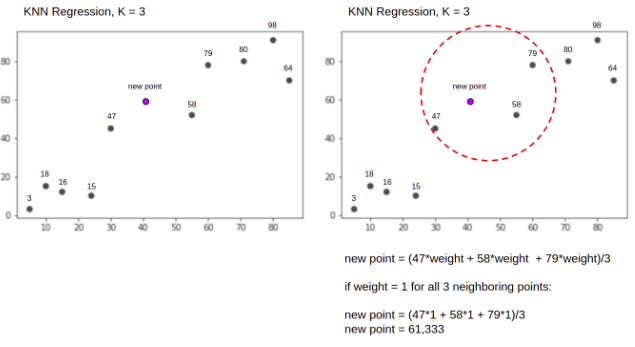


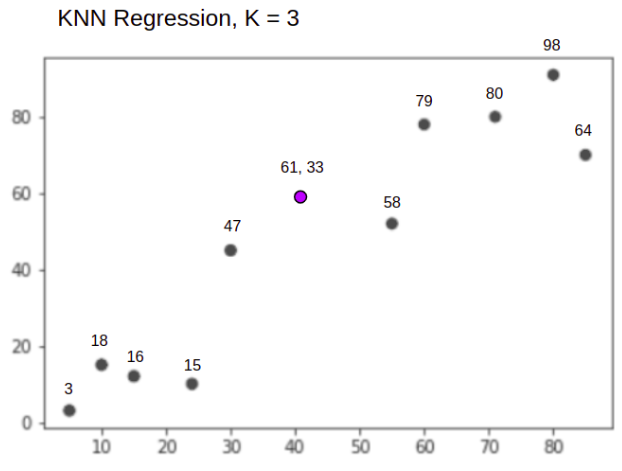

Algoritma KNN akan memulai dengan menghitung jarak titik baru dari semua titik. Kemudian menemukan 3 titik dengan jarak terkecil ke titik baru. Hal ini terlihat pada gambar kedua di atas, dimana tiga titik terdekat yaitu 47, 58, dan 79 telah dilingkari. Setelah itu, ia menghitung jumlah bobot dari 47, 58, dan 79 - dalam hal ini bobotnya sama dengan 1 - kita menganggap semua titik sama, namun kita juga dapat menetapkan bobot berbeda berdasarkan jarak. Setelah dihitung jumlah tertimbangnya, nilai poin barunya adalah 61,33.

# **k-NN with `k = 3` , when used for `classification`.**

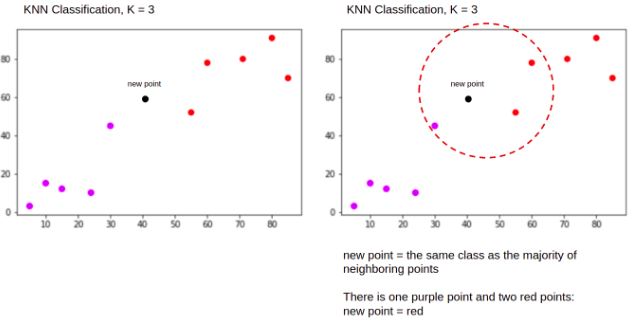

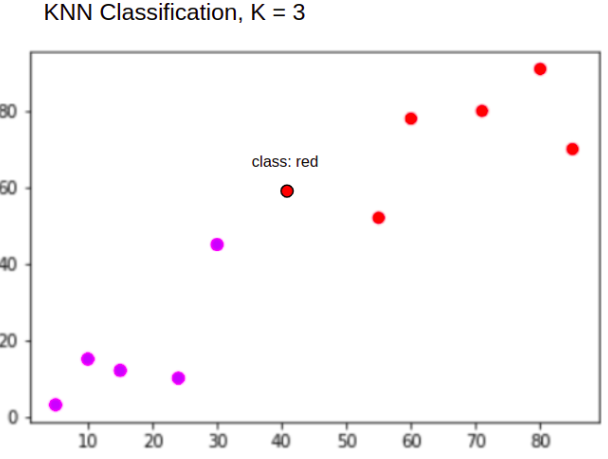

Algoritma KNN akan memulai dengan cara yang sama seperti sebelumnya, dengan menghitung jarak titik baru dari semua titik, mencari 3 titik terdekat dengan jarak terkecil ke titik baru, dan kemudian, alih-alih menghitung angka, algoritma tersebut menetapkan titik baru pada kelas yang mayoritas dari tiga titik terdekatnya berada, yaitu kelas red. Oleh karena itu titik data baru akan diklasifikasikan sebagai "Red".

# **The Scikit-Learn California Housing Dataset**

Kami akan menggunakan dataset `California housing` untuk mengilustrasikan cara kerja algoritma KNN. Dataset ini berasal dari sensus AS tahun 1990. Satu baris dataset mewakili sensus satu block group.

Di bagian ini, kami akan membahas detail California Housing Dataset, sehingga Anda dapat memperoleh pemahaman intuitif tentang data yang akan kami kerjakan. Sangat penting untuk mengetahui data Anda sebelum mulai mengerjakannya.

Block group adalah unit geografis terkecil yang data sampelnya diterbitkan oleh Biro Sensus AS. Selain block group, istilah lain yang digunakan adalah household, household adalah sekelompok orang yang berada dalam suatu rumah.

Dataset terdiri dari 9 attributes :
- **MedInc** - median income in block group
- **HouseAge** - median house age in a block group
- **AveRooms** - the average number of rooms (provided per household)
- **AveBedrms** - the average number of bedrooms (provided per household)
- **Population** - block group population
- **AveOccup** - the average number of household members
- **Latitude** - block group latitude
- **Longitude** - block group longitude
- **MedHouseVal** - median house value for California districts (hundreds of thousands of dollars)

Dataset sudah menjadi bagian dari Scikit-Learn library, kita hanya perlu mengimpornya dan memuatnya sebagai dataframe :

In [1]:
from sklearn.datasets import fetch_california_housing
# as_frame=True loads the data in a dataframe format, with other metadata besides it
california_housing = fetch_california_housing(as_frame=True)
# Select only the dataframe part and assign it to the df variable
df = california_housing.frame

Mengimpor data langsung dari Scikit-Learn, mengimpor lebih dari sekedar kolom dan angka dan menyertakan deskripsi data sebagai `Bunch` object - jadi kami baru saja mengekstrak `frame` nya.

Mari import Pandas dan intip beberapa baris data pertama:

In [2]:
import pandas as pd
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Dalam panduan ini, kita akan menggunakan `MedInc`, `HouseAge`, `AveRooms`, `AveBedrms`, `Population`, `AveOccup`, `Latitude`, `Longitude` untuk memprediksi `MedHouseVal`.



# **Regression using K-Nearest Neighbors with Scikit-Learn**

Sejauh ini, kita telah mengetahui dataset kita dan sekarang dapat melanjutkan ke langkah lain dalam algoritma KNN.

## **Preprocessing Data for KNN Regression**

Preprocessing adalah tempat munculnya perbedaan pertama antara tugas regression dan classification. Karena bagian ini membahas tentang regression, kami akan menyiapkan kumpulan data kami sesuai dengan itu.

Untuk regression, kita perlu memprediksi nilai median rumah lainnya. Untuk melakukannya, kami akan menetapkan `MedHouseVal` ke y dan semua kolom lainnya ke X hanya dengan menghapus `MedHouseVal`:

In [3]:
y = df['MedHouseVal']
X = df.drop(['MedHouseVal'], axis = 1)

Dengan melihat deskripsi variabel-variabel kita, kita dapat melihat bahwa kita mempunyai perbedaan dalam pengukurannya. Agar tidak menebak-nebak, mari gunakan metode `describe()` untuk memeriksa :

In [4]:
# .T transposes the results, transforming rows into columns
X.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


Di sini kita dapat melihat bahwa `mean` value dari `MedInc` adalah sekitar 3.87 dan`mean` value dari `HouseAge` adalah sekitar 28.64, menjadikannya 7.4 kali lebih besar dari `MedInc`. Ciri-ciri lain juga memiliki perbedaan mean dan standard deviation - untuk melihatnya, lihat `mean` dan `std` serta amati jaraknya satu sama lain. Untuk `MedInc` `std` kira-kira 1.9, untuk `HouseAge`, `std` nya 12,59 dan hal yang sama berlaku untuk fitur lainnya.

Kami menggunakan algoritma berdasarkan *distance and distance algorithm* sangat menderita karena data yang tidak berada pada skala yang sama, seperti data ini. Skala titik mungkin (dan dalam praktiknya, hampir selalu) mendistorsi jarak sebenarnya antar nilai.

Untuk melakukan Feature Scaling, kita akan menggunakan kelas `StandardScaler` Scikit-Learn nanti. Jika kita menerapkan penskalaan sekarang (sebelum train-test split), penghitungannya akan mencakup test data, sehingga secara efektif *leaking* informasi test data ke seluruh pipeline. Sayangnya, *data leakage* semacam ini sering diabaikan sehingga menghasilkan temuan yang tidak dapat direproduksi atau hanya ilusi.


## **Splitting Data into Train and Test Sets**

Agar dapat menskalakan data tanpa `leakage`, namun juga untuk mengevaluasi hasil dan menghindari overfitting, kami akan membagi dataset menjadi train dan test splits.

Cara mudah untuk membuattrain dan test splits adalah metode `train_test_split` dari Scikit-Learn. Splitting tidak terpecah secara linier di beberapa titik, tetapi mengambil sampel X% dan Y% secara acak. Agar proses ini dapat direproduksi (untuk membuat metode selalu mengambil sampel titik data yang sama), kita akan menyetel argumen `random_state` ke `SEED` tertentu:

In [5]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

Potongan kode ini mengambil sampel 75% data untuk training dan 25% data untuk testing. Dengan mengubah `test_size` menjadi 0.3, misalnya, Anda dapat train dengan 70% data dan test dengan 30%.

Dengan menggunakan 75% data untuk training dan 25% untuk testing, dari 20640 record, training set berisi 15480 dan testing set berisi 5160. Kita dapat memeriksa angka-angka tersebut dengan cepat dengan printing the lengths of the full dataset and of split data:

In [6]:
print(len(X))       # 20640
print(len(X_train)) # 15480
print(len(X_test))  # 5160

20640
15480
5160


Great! Kami sekarang dapat fit the data scaler pada `X_train`, dan scale `X_train` dan `X_test` tanpa leaking data apa pun dari `X_test` ke `X_train`.

## **Feature Scaling for KNN Regression**

Dengan meng-import `StandardScaler`, dengan membuat instance, fitting dengan train data (mencegah leakage), dan mentransformasikan train and test datasets, kita dapat melakukan feature scaling :

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit only on X_train
scaler.fit(X_train)

# Scale both X_train and X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Note**: Karena Anda sering kali memanggil `scaler.fit(X_train)` diikuti dengan `scaler.transform(X_train)` - Anda dapat memanggil satu `scaler.fit_transform(X_train)` diikuti dengan `scaler.transform(X_test)` untuk mempersingkat panggilan!

Sekarang data kami telah scaled! Scaler hanya mempertahankan data points, dan bukan column names, saat diterapkan pada DataFrame. Mari kita atur data menjadi DataFrame lagi dengan column names dan gunakan `describe()` untuk mengamati perubahan `mean` dan `std` :

In [8]:
col_names=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
scaled_df = pd.DataFrame(X_train, columns=col_names)
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,15480.0,2.074711e-16,1.000032,-1.774632,-0.688854,-0.175663,0.464450,5.842113
HouseAge,15480.0,-1.232434e-16,1.000032,-2.188261,-0.840224,0.032036,0.666407,1.855852
AveRooms,15480.0,-1.620294e-16,1.000032,-1.877586,-0.407008,-0.083940,0.257082,56.357392
AveBedrms,15480.0,7.435912e-17,1.000032,-1.740123,-0.205765,-0.108332,0.007435,55.925392
Population,15480.0,-8.996536e-17,1.000032,-1.246395,-0.558886,-0.227928,0.262056,29.971725
AveOccup,15480.0,1.055716e-17,1.000032,-0.201946,-0.056581,-0.024172,0.014501,103.737365
Latitude,15480.0,7.890329e-16,1.000032,-1.451215,-0.799820,-0.645172,0.971601,2.953905
Longitude,15480.0,2.206676e-15,1.000032,-2.380303,-1.106817,0.536231,0.785934,2.633738


Amati bagaimana semua standard deviation sekarang menjadi `1` dan `mean`-nya menjadi lebih kecil. Ini yang membuat data kita lebih seragam! Mari kita train dan evaluate a KNN-based regressor.

## **Training and Predicting KNN Regression**

Scikit-Learn's intuitive dan stable API membuat training regressors dan classifiers menjadi sangat mudah. Mari import
`KNeighborsRegressor` class dari modul `sklearn.neighbors`, buat instance-nya, dan sesuaikan dengan train data kita :

In [9]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(X_train, y_train)

KNeighborsRegressor()

Dalam kode di atas, `n_neighbours` adalah nilai K, atau jumlah tetangga yang akan dipertimbangkan algoritma untuk memilih nilai median rumah baru. 5 adalah nilai default untuk `KNeighborsRegressor()`. Tidak ada nilai ideal untuk K dan dipilih setelah testing dan evaluation, namun, sebagai permulaan, 5 adalah nilai yang umum digunakan untuk KNN dan dengan demikian ditetapkan sebagai nilai default.

Langkah terakhir adalah membuat prediksi pada test data kita. Untuk melakukannya, jalankan skrip berikut:

In [10]:
y_pred = regressor.predict(X_test)

Kami sekarang dapat mengevaluasi seberapa baik model kami menggeneralisasi data baru yang kami beri label (kebenaran dasar) - test set!

## **Evaluating the Algorithm for KNN Regression**

Regression Metrics yang paling umum digunakan untuk mengevaluasi algoritma adalah mean absolute error `(MAE)`, mean squared error `(MSE)`, root mean squared error `(RMSE)`, dan coefficient of determination `(R2)` :

1. **Mean Absolute Error (MAE)** : Saat kita mengurangkan predicted values dari actual values, dapatkan error-nya, jumlahkan absolute values dari error tersebut, dan dapatkan meannya. Metric ini memberikan gambaran overall error untuk setiap prediction model, semakin kecil (mendekati 0) semakin baik:

$$mae = (\frac{1}{n}) ∑ |Actual - Predicted|$$

- **Note** : Anda mungkin juga menemukan notasi $y$ dan $ŷ$ (dibaca sebagai y-hat) dalam persamaan. $y$ mengacu pada actual value dan $ŷ$ mengacu pada predicted value.

2. **Mean Squared Error (MSE)** : Hal ini mirip dengan MAE mettric, namun mengkuadratkan absolute values dari error. Sama halnya dengan MAE, semakin kecil atau mendekati 0, semakin baik. MSE value dikuadratkan sehingga membuat error yang besar menjadi lebih besar lagi. Satu hal yang perlu diperhatikan adalah bahwa metric ini biasanya sulit diinterpretasikan karena ukuran nilainya dan fakta bahwa skalanya tidak sama dengan data.

$$mse = ∑ (Actual - Predicted)^2$$

3. **Root Mean Squared Error (RMSE)** : Mencoba memecahkan masalah interpretasi yang timbul pada MSE dengan mendapatkan akar kuadrat dari nilai akhirnya, sehingga dapat menskalakannya kembali ke unit data yang sama. Lebih mudah untuk menafsirkan dan baik ketika kita perlu menampilkan atau menunjukkan nilai sebenarnya dari data dengan error. Ini menunjukkan seberapa besar variasi data, jadi, jika kita memiliki RMSE sebesar 4.35, model kita dapat membuat kerror karena model tersebut menambahkan 4.35 ke nilai sebenarnya, atau memerlukan 4.35 untuk mendapatkan nilai sebenarnya. Semakin mendekati 0, semakin baik juga.

$$rmse = \sqrt {\sum(Actual - Predicted)^2}$$

Metode mean_absolute_error() dan mean_squared_error() dari sklearn.metrics dapat digunakan untuk menghitung metric tersebut seperti dapat dilihat pada cuplikan berikut :

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')

mae: 0.4460739527131783
mse: 0.4316907430948294
rmse: 0.6570317671884894


$R^2$ dapat dihitung langsung dengan metode `score()` :

In [12]:
regressor.score(X_test, y_test)

0.6737569252627673

Hasilnya menunjukkan bahwa overall error dan mean error algoritma KNN kami adalah sekitar 0.44 , dan 0.43. Selain itu, RMSE menunjukkan bahwa kita dapat melampaui atau menurunkan nilai data sebenarnya dengan menambahkan 0.65 atau mengurangi 0.65 . Seberapa baguskah itu?

In [13]:
y.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

Mean adalah 2.06 dan standard deviation dari mean-nya adalah 1.15 sehingga score kami sebesar ~ 0.44 tidak terlalu bagus, namun tidak terlalu buruk.

Dengan $R^2$, semakin mendekati 1 (atau 100), semakin baik. $R^2$ memberitahukan seberapa besar perubahan data, atau data variance yang dipahami atau dijelaskan oleh KNN.

$$R^2 = 1 - \frac{\sum(Actual - Predicted)^2}{\sum(Actual - Actual Mean)^2}$$

Dengan nilai $R^2$ 0.67 , kita dapat melihat bahwa model kita menjelaskan 67% data variance. Sudah lebih dari 50%, tidak apa-apa, tapi tidak terlalu bagus. Adakah cara agar kita bisa berbuat lebih baik?

Kita telah menggunakan **k** yang telah ditentukan dengan nilai 5, jadi kita menggunakan 5 neighbors untuk memprediksi target kita yang belum tentu merupakan angka terbaik. Untuk memahami jumlah **k** yang ideal, kita dapat menganalisis algorithm errors dan memilih **k** yang meminimalkan kerugian.

## **Finding the Best K for KNN Regression**

Idealnya, Anda akan melihat metric mana yang lebih sesuai dengan konteks Anda - namun biasanya menarik untuk menguji semua metric. Kapan pun Anda bisa menguji semuanya, lakukanlah. Di sini, kami akan menunjukkan cara memilih **k** terbaik hanya dengan menggunakan mean absolute error, namun Anda dapat mengubahnya ke metric lain dan membandingkan hasilnya.

Untuk melakukan ini, kita akan membuat for loop dan menjalankan model yang memiliki neighbors 1 hingga X. Pada setiap interaksi, kita akan menghitung MAE dan memplot jumlah **k** beserta hasil MAE :

In [14]:
error = []

# Calculating MAE error for K values between 1 and 39
for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)

Sekarang , plot the errors :

Text(0, 0.5, 'Mean Absolute Error')

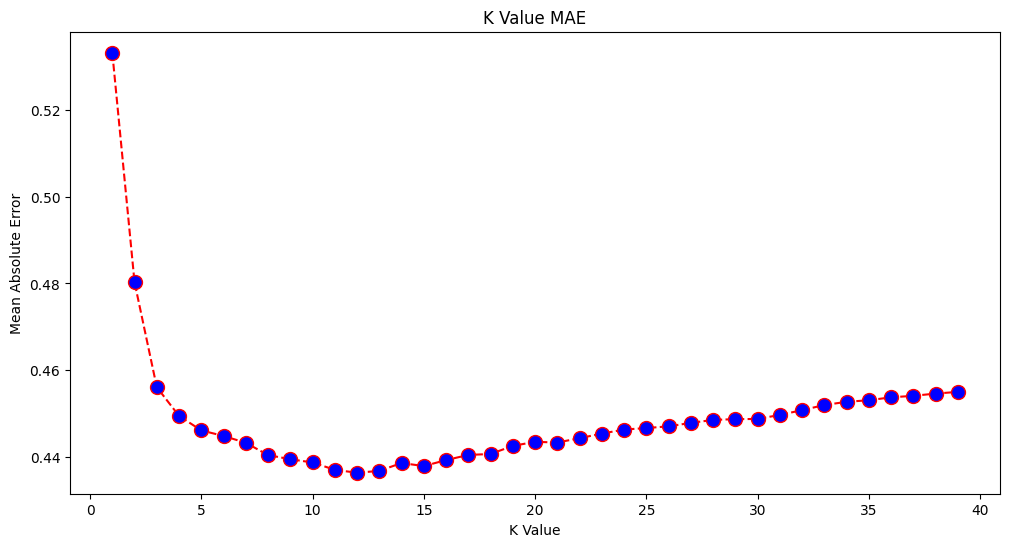

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red',
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)

plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

Dilihat dari plotnya, sepertinya nilai MAE terendah adalah ketika **k** = 12. Mari kita lihat lebih dekat plotnya untuk memastikannya dengan memplot lebih sedikit data :

Text(0, 0.5, 'Mean Absolute Error')

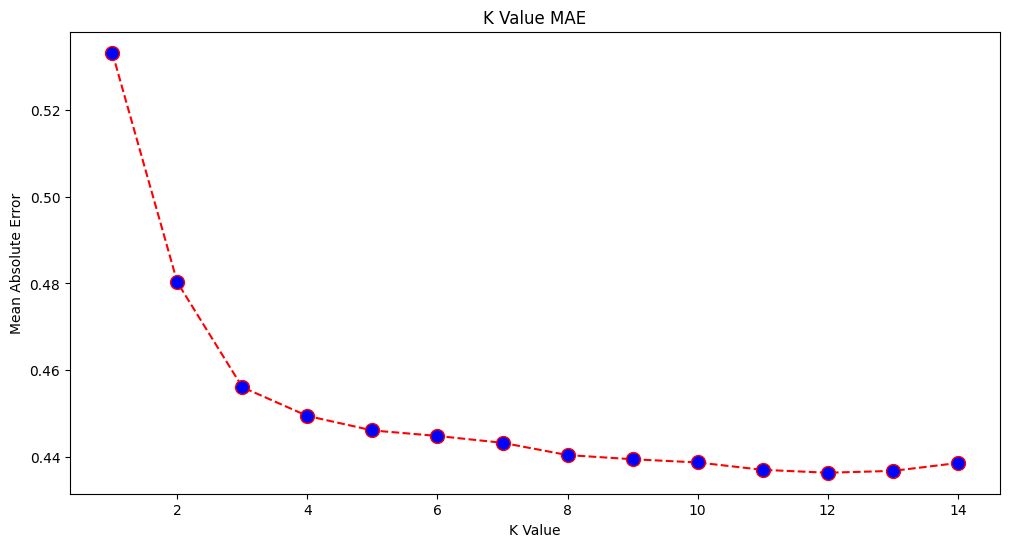

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), error[:14], color='red',
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

Anda juga bisa mendapatkan lowest error dan indeks titik tersebut menggunakan fungsi `min()` bawaan (berfungsi pada daftar) atau mengonversi daftar menjadi array NumPy dan mendapatkan `argmin()` (indeks elemen dengan nilai terendah ):

In [17]:
import numpy as np

print(min(error))               # 0.43631325936692505
print(np.array(error).argmin()) # 11

0.43631325936692505
11


Kami mulai menghitung neighbors pada 1, sementara arrays 0-based, jadi indeks ke-11 adalah 12 neighbors!

Artinya diperlukan 12 neighbors untuk dapat memprediksi suatu titik dengan lowest MAE error. Kita dapat menjalankan model dan metric lagi dengan 12 neighbors untuk membandingkan hasilnya :

In [18]:
knn_reg12 = KNeighborsRegressor(n_neighbors=12)
knn_reg12.fit(X_train, y_train)
y_pred12 = knn_reg12.predict(X_test)
r2 = knn_reg12.score(X_test, y_test)

mae12 = mean_absolute_error(y_test, y_pred12)
mse12 = mean_squared_error(y_test, y_pred12)
rmse12 = mean_squared_error(y_test, y_pred12, squared=False)
print(f'r2: {r2}, \nmae: {mae12} \nmse: {mse12} \nrmse: {rmse12}')

r2: 0.6887495617137436, 
mae: 0.43631325936692505 
mse: 0.4118522151025172 
rmse: 0.6417571309323467


Dengan 12 neighbors, model KNN kami sekarang menjelaskan 69% variance dalam data, dan kehilangan sedikit lebih sedikit, mulai dari `0.44 menjadi 0.43` , `0.43 menjadi 0.41`, dan `0.65 menjadi 0.64` dengan metric masing-masing. Ini bukan kemajuan yang besar, tapi tetap saja merupakan kemajuan.

**Note** : Melangkah lebih jauh dalam analisis ini, melakukan Exploratory Data Analysis (EDA) bersama dengan residual analysis dapat membantu memilih features dan mencapai hasil yang lebih baik.

Kita telah melihat cara menggunakan KNN untuk regression. Tetapi bagaimana jika kita ingin mengklasifikasikan suatu titik alih-alih memprediksi nilainya? Sekarang, kita bisa melihat cara menggunakan KNN untuk classification.

# **Classification using K-Nearest Neighbors with Scikit-Learn**

Dalam tugas ini, alih-alih memprediksi continuous value, kami ingin memprediksi class yang termasuk dalam kelompok blok tersebut. Untuk melakukan hal tersebut, kita dapat membagi nilai median rumah untuk suatu distrik ke dalam beberapa kelompok dengan rentang atau bin nilai rumah yang berbeda.

Saat Anda ingin menggunakan continuous value untuk classification, Anda biasanya dapat bin datanya. Dengan cara ini, Anda dapat memprediksi kelompok, bukan nilai.

## **Preprocessing Data for Classification**

Mari buat dataset untuk mengubah continuous value ke dalam categories :

In [19]:
# Creating 4 categories and assigning them to a MedHouseValCat column
df["MedHouseValCat"] = pd.qcut(df["MedHouseVal"], 4, retbins=False, labels=[1, 2, 3, 4])

Kemudian, kita dapat membagi dataset menjadi attributes dan labels-nya :

In [20]:
X = df.drop(['MedHouseVal', 'MedHouseValCat'], axis = 1)
y = df['MedHouseValCat']

Karena kita telah menggunakan kolom `MedHouseVal` untuk membuat bins , kita perlu menghapus kolom `MedHouseVal` dan kolom `MedHouseValCat` dari X. Dengan cara ini, DataFrame akan berisi 8 kolom pertama dari dataset (yaitu attributes, features) sedangkan y hanya akan berisi label yang ditetapkan `MedHouseValCat`.

**Note** : Anda juga dapat memilih kolom menggunakan `.iloc()` alih-alih membuangnya. Saat menghapus, perlu diketahui bahwa Anda perlu menetapkan nilai y sebelum menetapkan nilai X, karena Anda tidak dapat menetapkan kolom DataFrame yang dihapus ke objek lain di memori.

## **Splitting Data into Train and Test Sets**

Seperti yang telah dilakukan dengan regression, kami juga akan membagi dataset menjadi training dan test split. Karena kami memiliki data yang berbeda, kami perlu mengulangi proses ini :

In [21]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

Kami akan menggunakan nilai standar Scikit-Learn yaitu 75% training data dan 25% testing data lagi. Ini berarti kita akan memiliki jumlah catatan train dan test yang sama seperti pada regression sebelumnya.

## **Feature Scaling for Classification**

Karena kita berurusan dengan dataset yang belum diproses dan unit pengukurannya yang bervariasi, kita akan melakukan feature sclaing lagi, dengan cara yang sama seperti yang kita lakukan untuk data regression :

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## **Training and Predicting for Classification**

Setelah melakukan binning, splitting, dan scaling data nya, kami akhirnya dapat memasukkan pengklasifikasi ke dalamnya. Untuk prediksinya, kita akan menggunakan 5 neighbors lagi sebagai baseline. Anda juga dapat membuat instance class `KNeighbors_` tanpa argumen apa pun dan secara otomatis akan menggunakan 5 neighbors. Di sini, alih-alih mengimpor `KNeighborsRegressor`, kita akan mengimpor kelas `KNeighborsClassifier` :

In [23]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

Setelah fitting `KNeighborsClassifier` , kita dapat memprediksi class test data :

In [24]:
y_pred = classifier.predict(X_test)

Saatnya mengevaluasi prediksi! Akankah memprediksi kelas menjadi pendekatan yang lebih baik daripada memprediksi nilai dalam kasus ini? Mari kita evaluasi algoritme untuk melihat apa yang terjadi.

## **Evaluating KNN for Classification**

Untuk mengevaluasi k-NN classifier, kita juga dapat menggunakan metode `score`, tetapi metode ini mengeksekusi metric yang berbeda karena kita menilai classifier dan bukan regressor. Metric dasar untuk klasifikasi adalah `accuracy`. Ini menjelaskan berapa banyak prediksi yang benar dari pengklasifikasi kami. Nilai accuracy terendah adalah 0 dan tertinggi 1. Nilai tersebut biasanya kita kalikan dengan 100 untuk mendapatkan persentase.

$$accuracy = \frac{number of correct predictions}{total number of predictions}$$

**Note** : Sangat sulit untuk mendapatkan accuracy 100% pada data nyata. Jika hal ini terjadi, ketahuilah bahwa ada leaking atau kesalahan yang mungkin terjadi - tidak ada konsensus mengenai nilai accuracy yang ideal dan nilai ini juga bergantung pada konteks. Bergantung pada cost of error (seberapa buruk jika kita memercayai pengklasifikasi dan ternyata salah), tingkat kesalahan yang dapat diterima mungkin 5%, 10%, atau bahkan 30%.

Mari kita nilai pengklasifikasi kita:

In [25]:
acc =  classifier.score(X_test, y_test)
print(acc)

0.6191860465116279


Dengan melihat skor yang dihasilkan, kami dapat menyimpulkan bahwa pengklasifikasi kami memberikan ~62% class kami dengan benar. Hal ini sudah membantu dalam analisis, meskipun hanya dengan mengetahui apa yang benar pada pengklasifikasi, sulit untuk memperbaikinya.

Ada 4 class dalam dataset kita - bagaimana jika pengklasifikasi kita mendapatkan 90% class 1, 2, dan 3 benar, tetapi hanya 30% class 4 kan?

Kegagalan sistemik pada beberapa class, dibandingkan dengan kegagalan seimbang yang terjadi antar class, keduanya dapat menghasilkan skor accuracy 62%. Accuracy bukanlah metric yang baik untuk evaluasi sebenarnya - namun berfungsi sebagai proksi yang baik. Seringkali, dengan dataset yang seimbang, accuracy 62% tersebar secara relatif merata. Selain itu, seringkali dataset tidak seimbang, jadi kita kembali ke titik awal dengan accuracy yang tidak mencukupi.

Kita dapat melihat lebih dalam hasilnya menggunakan metrik lain untuk dapat menentukannya. Langkah ini juga berbeda dengan regression, disini kita akan menggunakan:

1. **Confusion Matrix** : Untuk mengetahui seberapa banyak kita mendapat benar atau salah untuk setiap kelas. Nilai yang benar dan diprediksi dengan benar disebut *true positives*, sedangkan nilai yang diprediksi positif tetapi tidak positif disebut *false positives*. Tata nama *true negatives* dan *false negatives* yang sama digunakan untuk nilai negatif.

2. **Precision** : Untuk memahami nilai prediksi benar apa yang dianggap benar oleh pengklasifikasi kami. Precision akan membagi nilai-nilai positif yang sebenarnya dengan apa pun yang diperkirakan positif.

$$precision = \frac{true positive}{true positive + false positive}$$

3. **Recall** : Untuk memahami berapa banyak hal positif yang diidentifikasi oleh pengklasifikasi kami. Recall dihitung dengan membagi hasil positif sebenarnya dengan apa pun yang seharusnya diprediksi positif.

$$recall = \frac{true positive}{truepositive + false negative}$$

4. F1-score : Apakah balanced atau harmonic mean dari precision dan recall. Nilai terendah adalah 0 dan tertinggi adalah 1. Jika skor f1 sama dengan 1, berarti semua kelas diprediksi dengan benar - ini adalah skor yang sangat sulit diperoleh dengan data nyata (pengecualian hampir selalu ada).

$$f1-score = 2 * \frac{precision * recall}{precision + recall}$$

**Note** : Weighted F1-score juga ada, dan itu hanya F1 yang tidak menerapkan weight yang sama untuk semua class. Weigth biasanya ditentukan oleh **support** kelas - berapa banyak contoh yang "support" F1-score (proporsi label yang termasuk dalam kelas tertentu). Semakin rendah support-nya (semakin sedikit instance suatu kelas), semakin rendah weighted F1 untuk kelas tersebut, karena semakin tidak dapat diandalkan.

Metode `confusion_matrix()` dan `classification_report()` pada modul `sklearn.metrics` dapat digunakan untuk menghitung dan menampilkan semua metrik ini. Confusion_matrix lebih baik divisualisasikan menggunakan heatmap. Classification report sudah memberi kita acccuracy, precision, recall, dan f1-score, tetapi Anda juga dapat mengimpor setiap metric ini dari sklearn.metrics.



              precision    recall  f1-score   support

           1       0.75      0.78      0.76      1292
           2       0.49      0.56      0.53      1283
           3       0.51      0.51      0.51      1292
           4       0.76      0.62      0.69      1293

    accuracy                           0.62      5160
   macro avg       0.63      0.62      0.62      5160
weighted avg       0.63      0.62      0.62      5160



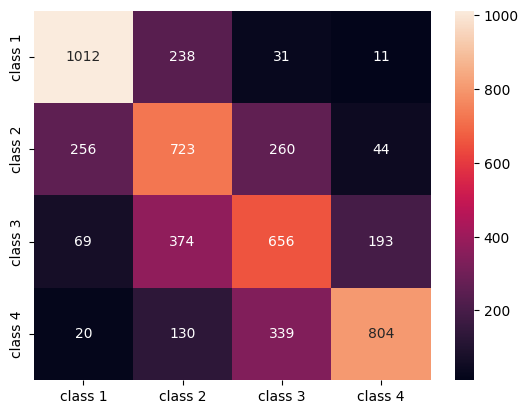

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap
import seaborn as sns

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3', 'class 4']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred),
                  columns=classes_names, index = classes_names)

# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

Hasilnya menunjukkan bahwa KNN mampu mengklasifikasikan seluruh 5160 record dalam test set dengan accuracy 62%, yang berada di atas rata-rata. Support cukup setara (distribusi kelas yang merata dalam kumpulan data), sehingga weighted F1 dan unweighted F1 akan kurang lebih sama.

Kita juga dapat melihat hasil metric untuk masing-masing 4 kelas. Dari situ kita dapat melihat bahwa `class 2` memiliki precision terendah, recall terendah, dan f1-score terendah. `class 3` berada tepat di belakang `class 2` karena memiliki nilai terendah, dan kemudian, ada `class 1` dengan nilai terbaik diikuti oleh `class 4`.

Dengan melihat confusion matrix, kita dapat melihat bahwa :
- `class 1` paling banyak dikira `class 2` sebanyak 238 kasus
- `class 2` untuk `class 1` sebanyak 256 entri, dan untuk `class 3` sebanyak 260 kasus
- `class 3` paling banyak salah oleh `class 2`, 374 entri, dan `class 4`, dalam 193 kasus
- `class 4` salah diklasifikasikan sebagai `class 3` untuk 339 entri, dan sebagai `class 2` dalam 130 kasus.

Juga, perhatikan bahwa diagonal menampilkan true positive values, ketika melihatnya, jelas terlihat bahwa `class 2` dan `class 3` memiliki predicted values yang paling tidak tepat.

Dengan hasil tersebut, kita dapat mempelajari analisis lebih dalam dengan memeriksanya lebih lanjut untuk mencari tahu mengapa hal itu terjadi, dan juga memahami apakah 4 kelas adalah cara terbaik untuk membuang data. Mungkin nilai dari `class 2` dan `class 3` terlalu dekat satu sama lain, sehingga sulit untuk membedakannya.

Selalu mencoba menguji data dengan jumlah bin yang berbeda untuk melihat apa yang terjadi.

Selain jumlah data bin yang sembarang, ada juga nomor sembarang lainnya yang telah kita pilih, yaitu jumlah **k** neighbors. Teknik yang sama yang kami terapkan pada tugas regression dapat diterapkan pada classification saat menentukan jumlah **k** yang memaksimalkan atau meminimalkan metric value.

## **Finding the Best K for KNN Classification**

Mari kita ulangi apa yang telah dilakukan untuk regression dan plot grafik nilai **k** dan metrik yang sesuai untuk test set. Anda juga dapat memilih metric mana yang lebih sesuai dengan konteks Anda, di sini, kami akan memilih `f1-score`.

Dengan cara ini, kita akan memplot `f1-score` untuk predicted values of the test set untuk semua nilai **k** antara 1 dan 40.

Pertama, kita mengimpor `f1_score` dari sklearn.metrics lalu menghitung nilainya untuk semua prediksi pengklasifikasi K-Nearest Neighbors, dengan **k** berkisar antara 1 hingga 40 :

In [27]:
from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

Langkah selanjutnya adalah memplot nilai `f1_score` terhadap nilai **k**. Perbedaan dari regression adalah daripada memilih nilai **k** yang meminimalkan error, kali ini kita akan memilih nilai yang memaksimalkan `f1-score`.

Text(0, 0.5, 'F1 Score')

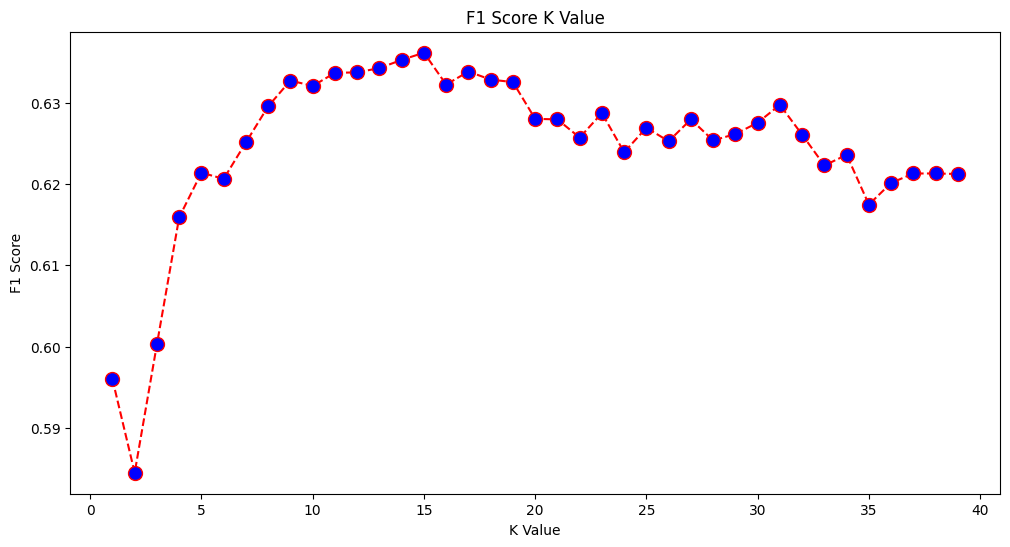

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

Dari outputnya, kita dapat melihat bahwa `f1-score` adalah yang tertinggi ketika nilai **k** adalah 15. Mari kita latih kembali pengklasifikasi kita dengan 15 neighbors dan lihat pengaruhnya terhadap hasil classification report kita :

In [29]:
classifier15 = KNeighborsClassifier(n_neighbors=15)
classifier15.fit(X_train, y_train)
y_pred15 = classifier15.predict(X_test)
print(classification_report(y_test, y_pred15))

              precision    recall  f1-score   support

           1       0.77      0.79      0.78      1292
           2       0.52      0.58      0.55      1283
           3       0.51      0.53      0.52      1292
           4       0.77      0.64      0.70      1293

    accuracy                           0.63      5160
   macro avg       0.64      0.63      0.64      5160
weighted avg       0.64      0.63      0.64      5160



Perhatikan bahwa metric kami telah meningkat dengan 15 neighbors, kami memiliki akurasi 63% dan `precision`, `recall`, dan `f1-score` yang lebih tinggi, namun kami masih perlu melihat lebih jauh pada bin untuk mencoba memahami mengapa `f1-score` untuk `class 2` dan `3` masih rendah.

Selain menggunakan KNN untuk regression dan determining block values serta classification, untuk determine block classes - kita juga dapat menggunakan KNN untuk mendeteksi nilai rata-rata blok yang berbeda dari kebanyakan - nilai yang tidak mengikuti apa yang dilakukan sebagian besar data. Dengan kata lain, kita bisa menggunakan KNN untuk `detecting outliers`.

# **Implementing KNN for Outlier Detection with Scikit-Learn**

Outlier Detection menggunakan metode lain yang berbeda dari yang kami lakukan sebelumnya untuk regression and classification.

Di sini, kita akan melihat seberapa jauh jarak masing-masing neighbors dari suatu titik data. Mari kita gunakan 5 neighbors default. Untuk titik data, kami akan menghitung jarak ke masing-masing K-neighbors terdekat. Untuk melakukan itu, kami akan mengimpor algoritma KNN lain dari Scikit-learn yang tidak spesifik untuk regression or classification yang disebut NearestNeighbours saja.

Setelah mengimpor, kami akan membuat instance kelas NearestNeighbors dengan 5 neighbors - Anda juga dapat membuat instance kelas tersebut dengan 12 neighbors untuk mengidentifikasi outlier dalam contoh regression kami atau dengan 15, untuk melakukan hal yang sama pada contoh clasification. Kami kemudian akan menyesuaikan train data kami dan menggunakan metode kneighbors() untuk menemukan jarak yang dihitung untuk setiap titik data dan indeks neighbors :

In [30]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors = 5)
nbrs.fit(X_train)
# Distances and indexes of the 5 neighbors
distances, indexes = nbrs.kneighbors(X_train)

Sekarang kita memiliki 5 jarak untuk setiap titik data - jarak antara titik tersebut dan 5 neighbors, dan indeks yang mengidentifikasinya. Mari kita intip tiga hasil pertama dan bentuk array untuk memvisualisasikannya dengan lebih baik.

Untuk melihat bentuk tiga jarak pertama, jalankan :

In [31]:
distances[:3], distances.shape

(array([[0.        , 0.12998939, 0.15157687, 0.16543705, 0.17750354],
        [0.        , 0.25535314, 0.37100754, 0.39090243, 0.40619693],
        [0.        , 0.27149697, 0.28024623, 0.28112326, 0.30420656]]),
 (15480, 5))

Perhatikan ada 3 baris dengan masing-masing 5 jarak. Kita juga dapat melihat indeks neighbors :

In [32]:
indexes[:3], indexes[:3].shape

(array([[    0,  8608, 12831,  8298,  2482],
        [    1,  4966,  5786,  8568,  6759],
        [    2, 13326, 13936,  3618,  9756]]),
 (3, 5))

Pada output di atas, kita dapat melihat indeks dari masing-masing 5 neighbors. Sekarang, kita dapat melanjutkan menghitung mean dari 5 jarak dan membuat grafik yang menghitung setiap baris pada sumbu X dan menampilkan setiap jarak mean pada sumbu Y :

Text(0, 0.5, 'Mean Distances')

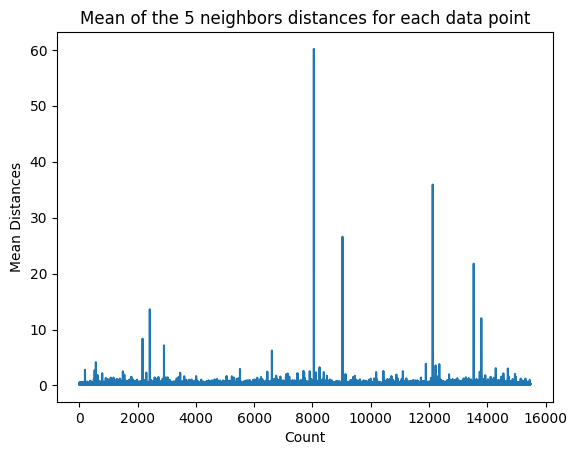

In [33]:
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of the 5 neighbors distances for each data point')
plt.xlabel('Count')
plt.ylabel('Mean Distances')

Perhatikan bahwa ada bagian grafik yang jarak mean mempunyai nilai yang seragam. Titik sumbu Y yang meannya tidak terlalu tinggi atau terlalu rendah adalah titik yang perlu kita identifikasi untuk memotong nilai outlier.

Dalam hal ini, jarak meana adalah 3. Mari kita plot lagi grafiknya dengan garis putus-putus horizontal agar dapat menemukannya:

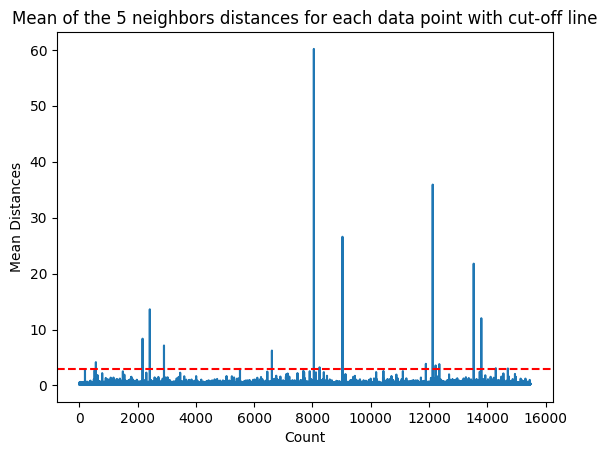

In [34]:
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of the 5 neighbors distances for each data point with cut-off line')
plt.xlabel('Count')
plt.ylabel('Mean Distances')
plt.axhline(y = 3, color = 'r', linestyle = '--')

Garis ini menandai jarak mean yang nilai-nilainya bervariasi. Artinya semua titik dengan jarak mean di atas 3 adalah outlier kita. Kita dapat mengetahui indeks titik-titik tersebut menggunakan `np.where()`. Metode ini akan menampilkan `True` atau `False` untuk setiap indeks sehubungan dengan kondisi mean di atas 3 :

In [35]:
import numpy as np

# Visually determine cutoff values > 3
outlier_index = np.where(dist_means > 3)
outlier_index

(array([  564,  2167,  2415,  2902,  6607,  8047,  8243,  9029, 11892,
        12127, 12226, 12353, 13534, 13795, 14292, 14707]),)

Sekarang kita memiliki indeks titik outlier. Mari kita temukan lokasinya di dataframe :

In [36]:
# Filter outlier values
outlier_values = df.iloc[outlier_index]
outlier_values

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,MedHouseValCat
564,4.8711,27.0,5.082811,0.944793,1499.0,1.880803,37.75,-122.24,2.86600,4
2167,2.8359,30.0,4.948357,1.001565,1660.0,2.597809,36.78,-119.83,0.80300,1
2415,2.8250,32.0,4.784232,0.979253,761.0,3.157676,36.59,-119.44,0.67600,1
2902,1.1875,48.0,5.492063,1.460317,129.0,2.047619,35.38,-119.02,0.63800,1
6607,3.5164,47.0,5.970639,1.074266,1700.0,2.936097,34.18,-118.14,2.26500,3
8047,2.7260,29.0,3.707547,1.078616,2515.0,1.977201,33.84,-118.17,2.08700,3
8243,2.0769,17.0,3.941667,1.211111,1300.0,3.611111,33.78,-118.18,1.00000,1
9029,6.8300,28.0,6.748744,1.080402,487.0,2.447236,34.05,-118.78,5.00001,4
11892,2.6071,45.0,4.225806,0.903226,89.0,2.870968,33.99,-117.35,1.12500,1
12127,4.1482,7.0,5.674957,1.106998,5595.0,3.235975,33.92,-117.25,1.24600,2


Outlier Detection kita telah selesai. Inilah cara kami mengenali setiap titik data yang menyimpang dari tren data umum. Kita dapat melihat bahwa ada 16 titik dalam train data api kita yang harus diperhatikan lebih lanjut, diselidiki, mungkin ditangani, atau bahkan dihapus dari data kita (jika salah masukan) untuk meningkatkan hasil. Poin-poin tersebut mungkin disebabkan oleh typing errors, mean block values inconsistencies, atau bahkan keduanya.

# **Pros and Cons of KNN**

Pada bagian ini, kami akan menyajikan beberapa pro dan kontra penggunaan k-NN Algorithm.

## **Pros**

- Mudah di-implementasikan
- Ini adalah lazy learning algorithm dan oleh karena itu tidak memerlukan training pada semua titik data (hanya menggunakan K-Nearest Neighbor untuk memprediksi). Hal ini membuat algoritma KNN jauh lebih cepat dibandingkan algoritma lain yang memerlukan training dengan seluruh dataset seperti `Support Vector Machines`,`Linear Regression`, dll.
- Karena KNN tidak memerlukan training sebelum membuat prediksi, data baru dapat ditambahkan dengan lancar
- Hanya ada dua parameter yang diperlukan untuk bekerja dengan KNN, yaitu nilai **k** dan distance(jarak) function.

## **Cons**

- Algoritma KNN tidak bekerja dengan baik pada data berdimensi tinggi karena dengan jumlah dimensi yang banyak, jarak antar titik menjadi "aneh", dan metrik jarak yang kita gunakan tidak tahan
- Terakhir, algoritma KNN tidak bekerja dengan baik dengan categorical features karena sulitnya mencari jarak antar dimensi dengan categorical features.

# **Conslusion**

KNN adalah algoritma yang sederhana namun kuat. Ini dapat digunakan untuk banyak tugas seperti regression, classification, atau outlier detection.

KNN telah banyak digunakan untuk menemukan kesamaan dokumen dan pengenalan pola. Ini juga telah digunakan untuk developing recommender systems dan untuk dimensionality reduction dan pre-processing steps for computer vision - khususnya tugas face recognition.

Dalam panduan ini - kita telah melalui regression, classification, dan outlier detection menggunakan implementasi K-Nearest Neighbor algorithm dari Scikit-Learn.